<img src="./img/HWNI_logo.svg"/>

# Lab A - Unpaired t-Tests - Solutions

In [1]:
# makes our plots show up inside Jupyter
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

# choose colors that work for most color-blind folks
sns.set_palette("colorblind")
sns.set(color_codes=True)

import util.lab03utils as utils 

# this makes our tables easier to read
utils.formatDataframes()

In this lab, we'll look at some more commonly-used and practical hypothesis tests than the simple example used in the
[hypothesis testing lab](../03 - Hypothesis Testing/Lab - Hypothesis Testing.ipynb).
In these tests, instead of collecting only one data point in our experimental condition, we'll collect multiple data points. All the tests considered in this lab -- paired and unpaired t-tests, non-parametric tests -- arise due to different choices of test statistic.

In this half of the lab, we'll be looking at using unpaired t-tests. On the programming side, we'll review some of our plotting skills and learn more about how to load datasets into pandas and how we organize those datasets.

## Dataset Introduction

Octopamine has been implicated in modulating feeding behaviors in both vertebrates and invertebrates. Pargyline has been shown to increase the levels of octopamine in the nervous system. 

We'll look at data from two experiments on octopamine and feeding behavior.

In the first, the effect of pargyline on sucrose consumption was tested in blowflies. Two groups of blowfies were used in this study: one group was injected with parglyine (n=295 flies) while the control group was injected with saline (n = 300 flies). The amount of sucrose consumed was then measured. [adapted from Samuels & Witmer, pg 220. Originally: Long & Murdock, PNAS 1983]

**Q1** Why is an unpaired test appropriate for this data set?

<font color='#1874CD'> ** There is no natural way to pair the data points -- they were measured in different flies at different times. **

## Loading Data

The cell below loads the data into pandas. The functions for loading external data all begin with "read", so you can check out your options by typing in `pd.read` and then hitting `Tab`. Other options include Excel files, the clipboard, and `.json` files. You can look at the documentation for each function in the usual way, with the `?` symbol.

The most basic format for storing data is the "comma-separated values", or `.csv`, format. There's a brief discussion of this format in the course tutorial on pandas. You can also view comma-separated values files in Excel and even save some `.xls` files as `.csv` files.

In [2]:
flyData = pd.read_csv('data/3a.csv',index_col=None)

flyData.sample(10)

,SucrConsump,Injection,Exp_Idx
160,2.9,Saline,1
39,13.0,Saline,1
556,46.7,Parg,1
797,15.6,PargYomb,2
545,35.9,Parg,1
452,36.4,Parg,1
24,24.3,Saline,1
222,20.6,Saline,1
672,9.4,Saline,2
292,13.2,Saline,1


Following the principles of ["tidy data"](http://www.jeannicholashould.com/tidy-data-in-python.html), we've stored each of our observations in a row. An observation includes the raw data (in this case, the amount of sugar consumed), the kind of injection the fly received, and, since we'll be looking at two experiments in this lab, an identifier for the experiment during which this datapoint was measured.

## Visualizing the Data

Begin by plotting the histograms and computing means and standard deviations for both groups of flies in experiment #1. Remember: you'll need to subset your data by experiment index and by injection.

Think about your histogram: should the bins be the same or different for the two groups? Is a rugplot helpful? Be ready to discuss your choices in class.

Group Saline:
	 Mean 14.96, SD 5.398315109371339
Group Parg:
	 Mean 46.363389830508474, SD 11.798279681205674


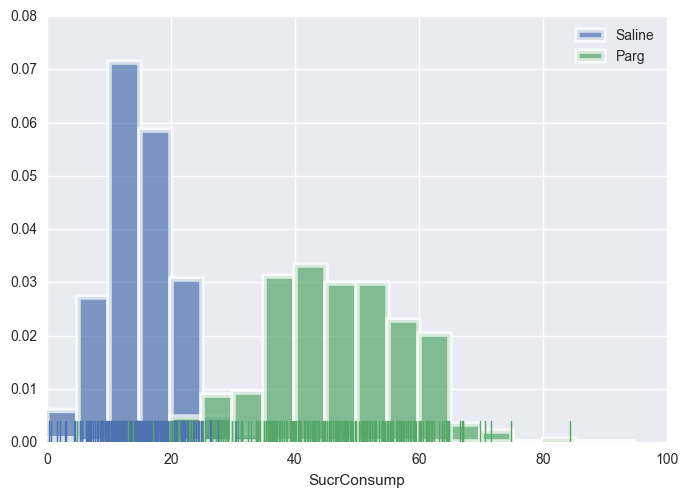

In [11]:
experimentIndex = 1

experimentData = flyData[flyData.Exp_Idx == experimentIndex]
injections = experimentData.Injection.unique()

for injection in injections:
    groupData = experimentData.SucrConsump[experimentData.Injection == injection]
    
    print("Group {}:".format(injection))
    print("\t Mean {0}, SD {1}".format(groupData.mean(),groupData.std()))
    
    sns.distplot(groupData,kde=False,rug=True,label=injection,
                 bins=range(0,100,5),
                    hist_kws={'alpha':0.7,
                              'edgecolor':'white',
                              'linewidth':4,
                              'normed':True}).legend()

**Q2** Based off of this visualization and these statistics, do you expect the difference of the means to be statistically significant (at the traditional/obligatory $\alpha = 0.05$? Why or why not?

<font color='#1874CD'>  
**
For the first experiment, the distributions have very little overlap and their means are several standard deviations apart, so I expect a significant finding.
**

**
For the second experiment, the distributions have substantial overlap and their means are closer together, relative to the standard deviation, so I do not expect a significant finding.
**

Now, visualize the data as a barplot with 95% confidence intervals error bars.

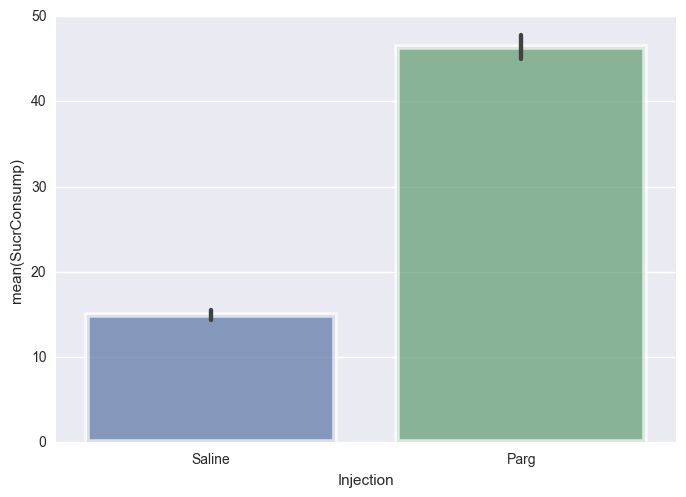

In [7]:
sns.barplot(data=experimentData,x="Injection",y="SucrConsump",ci=95,
            alpha=0.7,edgecolor='white',linewidth=4,);

**Q3** Based off of the barplot, what do you expect the result of your t-test to be?

<font color='#1874CD'>  

**
In the first experiment, the 95% CI bars are very far from each other, so we expect an extremely high t-statistic and thus low p-value.
**

**
In the second experiment, the 95% CI bars overlap substantially, so we expect a low t-statistic.
**

Now, plot the data as a boxplot.

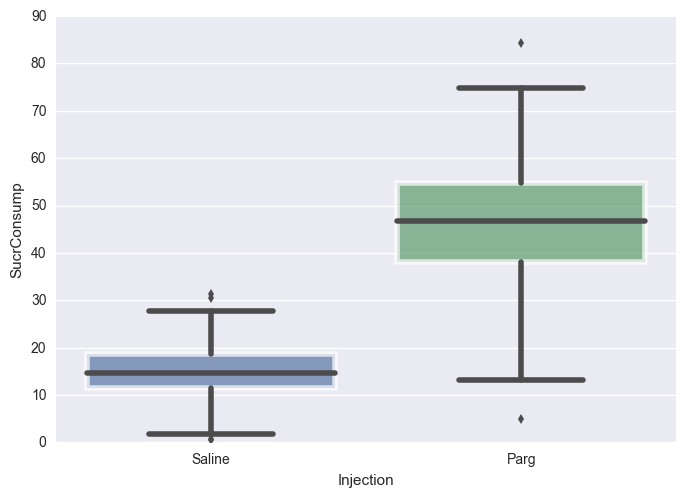

In [8]:
sns.boxplot(data=experimentData,x="Injection",y="SucrConsump",
           linewidth=4,
            boxprops={'edgecolor':'white','alpha':0.7});

** Q4 ** The boxplot can be used to see whether the assumptions for a t-test are met. What pieces of information would you use and what would they tell you?

<font color='#1874CD'>

**
We can see whether the distributions are symmetric, and so possibly Gaussian, or close to it.
**

## Running the Test

Now, we can use the `scipy` package to run a t-test to determine if the difference between the groups is statistically significant. The function `scipy.stats.ttest_ind` 
([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html))
will run a t-test for you.

**Q5** What are your results?

<font color='#1874CD'>

**
The results are as expected for both experiments.
**

In [9]:
groups = [experimentData.SucrConsump[experimentData.Injection == injection] for injection in injections]

scipy.stats.ttest_ind(groups[0],groups[1],
                      equal_var=False).pvalue

2.0938430514604942e-149

**Q6** One of the keyword arguments for `ttest_ind` is `equal_var`. This lets us switch from a version of the t-test that assumes both groups have the same variance to one that does not assume this. Which version is more appropriate in this case?

<font color='#1874CD'>

**
Since we have no reason to assume that the variances are the same, we should use the unequal-variances version of the test.
**

**
Warning: checking the variances and then using the result to decide which t-test to run is actually a form of double-dipping that can increase your false positive rate above $\alpha$!
**

In a follow-up experiment to further confirm octopamine positively modulates feeding behavior, an additional experiment was done with yohimbine (an antagonist of octopamine receptors in insects). One group was injected with parglyine and yohimbine (n = 130) while an additional control group was injected with saline (n = 100). The amount of sucrose consumed was then measured.

Repeat all of the above exercises for this experiment. There's no need to write all of your code again in new cells. If you wrote your code with good style, it should all be reusable -- just change which experiment number is used to subset the data all the way up at the top. You also don't need to add new cells for your written answers: simply include responses for both experiments in the cells above.